# Analyzer Configuration Samples

We present two configurations of the Analyzer that differ from the default configuration.

## Table Transformer

**Works best on:** Research papers (esp. in medical domain)

In this notebook, we demonstrate how the [Table Transformer](https://github.com/microsoft/table-transformer) models can be utilized for table detection and table segmentation by adjusting the analyzer's default configuration. 

Table Transformer consists of a table detection model and a table segmentation model. Table segmentation is already used in the default configuration. This configuration is interesting if you only need the table content.

## General configuration

In [ ]:
import os

# Choose PILLOW as image processing library
os.environ["USE_DD_PILLOW"]="True"
os.environ["USE_DD_OPENCV"]="False"

import deepdoctection as dd

from matplotlib import pyplot as plt
from IPython.core.display import HTML

In [ ]:
analyzer =dd.get_dd_analyzer(config_overwrite=
   ["PT.LAYOUT.WEIGHTS=microsoft/table-transformer-detection/pytorch_model.bin",
    "TEXT_ORDERING.INCLUDE_RESIDUAL_TEXT_CONTAINER=False", # Deactivating line detection. Only table content
    "TEXT_ORDERING.PARAGRAPH_BREAK=0.01",]) # TATR table detection model

analyzer.pipe_component_list[0].predictor.config.threshold = 0.8  # default threshold is at 0.1

[0527 17:27.23 @doctectionpipe.py:103]  INF  Processing 2312.13560_0.pdf
Unused or unrecognized kwargs: annotations, masks_path.
[0527 17:27.24 @context.py:133]  INF  ImageLayoutService total: 0.5424 sec.
[0527 17:27.24 @context.py:133]  INF  AnnotationNmsService total: 0.0001 sec.
[0527 17:27.24 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0527 17:27.24 @context.py:133]  INF  PubtablesSegmentationService total: 0.0 sec.
[0527 17:27.25 @context.py:133]  INF  ImageLayoutService total: 0.5435 sec.
[0527 17:27.26 @context.py:133]  INF  TextExtractionService total: 0.9776 sec.
[0527 17:27.26 @context.py:133]  INF  MatchingService total: 0.0031 sec.
[0527 17:27.26 @context.py:133]  INF  TextOrderService total: 0.0004 sec.


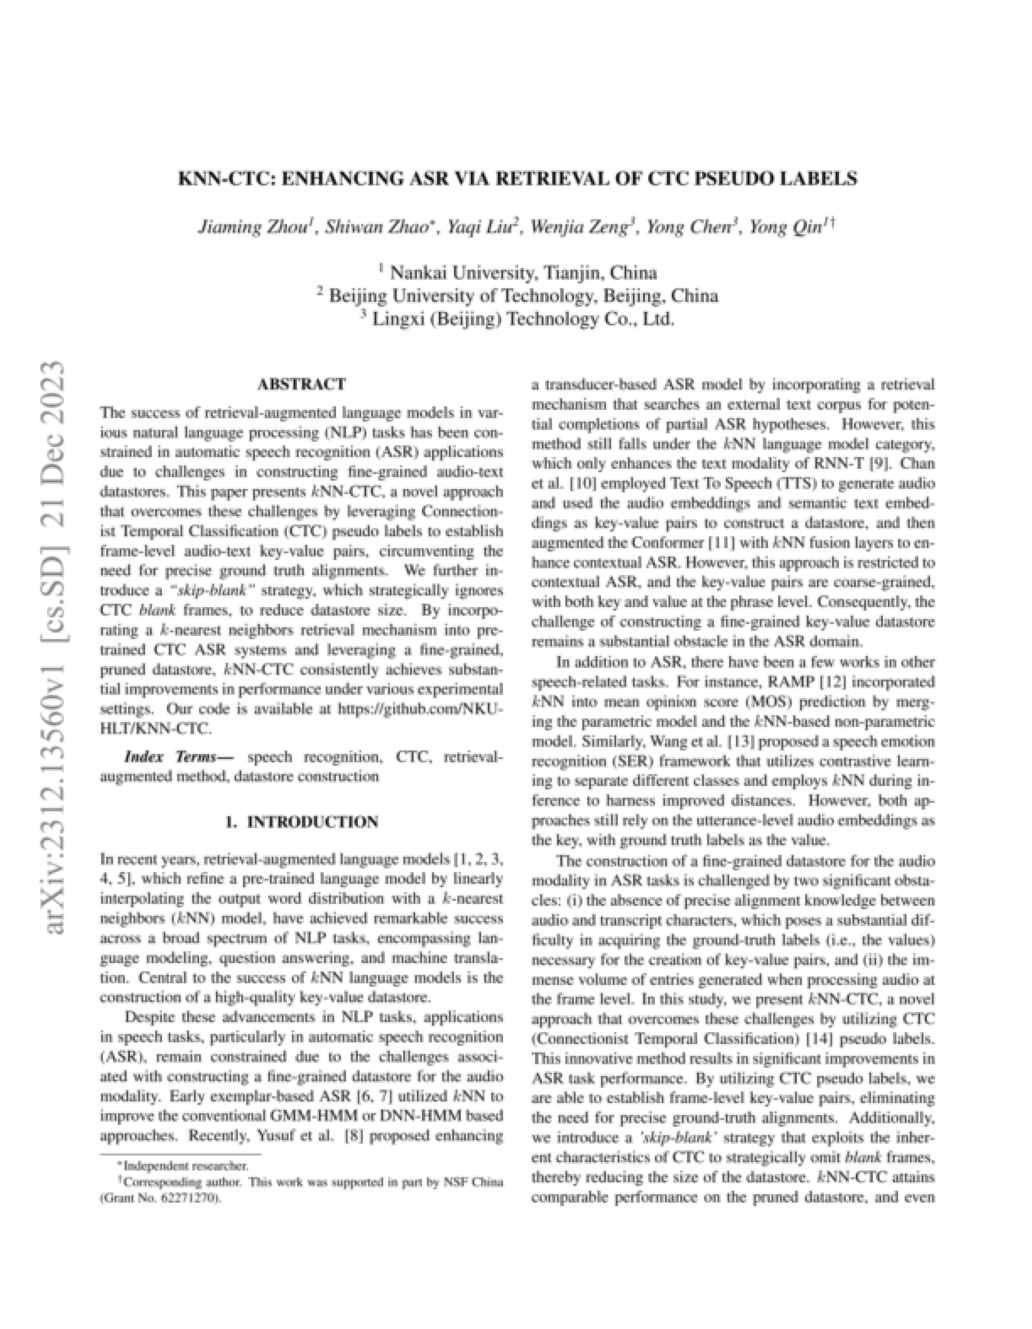

In [3]:
path="/path/to/dir/sample/2312.13560.pdf" # Use the PDF in the sample folder

df = analyzer.analyze(path=path)
df.reset_state()
df_iter = iter(df)

dp = next(df_iter)
np_image = dp.viz()

plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(np_image)

In [5]:
dp.text  # because of TEXT_ORDERING.INCLUDE_RESIDUAL_TEXT_CONTAINER=False, we do not generate text

''

[0527 17:27.36 @doctectionpipe.py:103]  INF  Processing 2312.13560_1.pdf
Unused or unrecognized kwargs: annotations, masks_path.
[0527 17:27.36 @context.py:133]  INF  ImageLayoutService total: 0.0814 sec.
[0527 17:27.36 @context.py:133]  INF  AnnotationNmsService total: 0.0 sec.
[0527 17:27.36 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0527 17:27.36 @context.py:133]  INF  PubtablesSegmentationService total: 0.0 sec.
[0527 17:27.36 @context.py:133]  INF  ImageLayoutService total: 0.2245 sec.
[0527 17:27.37 @context.py:133]  INF  TextExtractionService total: 0.75 sec.
[0527 17:27.37 @context.py:133]  INF  MatchingService total: 0.0028 sec.
[0527 17:27.37 @context.py:133]  INF  TextOrderService total: 0.0004 sec.
[0527 17:27.38 @doctectionpipe.py:103]  INF  Processing 2312.13560_2.pdf
Unused or unrecognized kwargs: annotations, masks_path.
[0527 17:27.38 @context.py:133]  INF  ImageLayoutService total: 0.0664 sec.
[0527 17:27.38 @context.py:133]  INF  AnnotationNmsServi

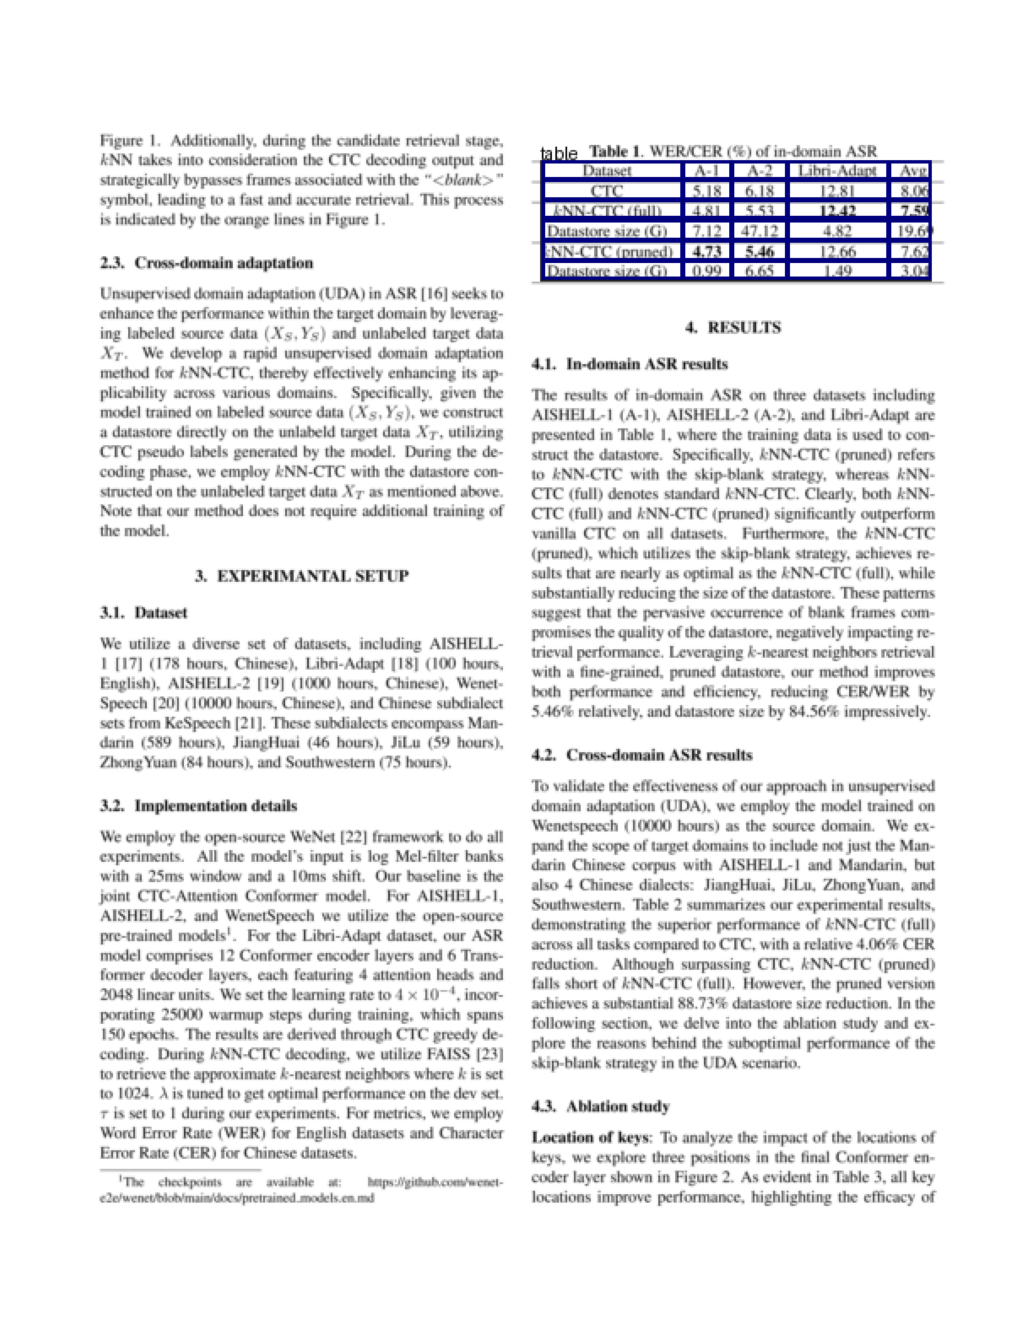

In [6]:
_ = next(df_iter)
dp = next(df_iter)
np_image = dp.viz()


plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(np_image)

In [7]:
dp.tables[0].csv

[['Dataset ', 'A-1 ', 'A-2 ', 'Libri-Adapt ', 'Avg. '],
 ['CTC ', '5.18 ', '6.18 ', '12.81 ', '8.06 '],
 ['KNN-CTC (full) ', '4.81 ', '5.53 ', '12.42 ', '7.59 '],
 ['Datastore size (G) ', '7.12 ', '47.12 ', '4.82 ', '19.69 '],
 ['KNN-CTC (pruned) ', '4.73 ', '5.46 ', '12.66 ', '7.62 '],
 ['Datastore size (G) ', '0.99 ', '6.65 ', '1.49 ', '3.04 ']]

In [8]:
dp.tables[0].number_of_rows, dp.tables[0].row_header_cells # does not detect row headers

(6, [])

[0527 17:27.50 @doctectionpipe.py:103]  INF  Processing 2312.13560_3.pdf
Unused or unrecognized kwargs: annotations, masks_path.
[0527 17:27.50 @context.py:133]  INF  ImageLayoutService total: 0.0797 sec.
[0527 17:27.50 @context.py:133]  INF  AnnotationNmsService total: 0.0 sec.
Unused or unrecognized kwargs: annotations, masks_path.
Unused or unrecognized kwargs: annotations, masks_path.
Unused or unrecognized kwargs: annotations, masks_path.
[0527 17:27.51 @context.py:133]  INF  SubImageLayoutService total: 0.8877 sec.
[0527 17:27.51 @context.py:133]  INF  PubtablesSegmentationService total: 0.0399 sec.
[0527 17:27.51 @context.py:133]  INF  ImageLayoutService total: 0.2474 sec.
[0527 17:27.52 @context.py:133]  INF  TextExtractionService total: 0.6857 sec.
[0527 17:27.52 @context.py:133]  INF  MatchingService total: 0.0044 sec.
[0527 17:27.52 @context.py:133]  INF  TextOrderService total: 0.0233 sec.


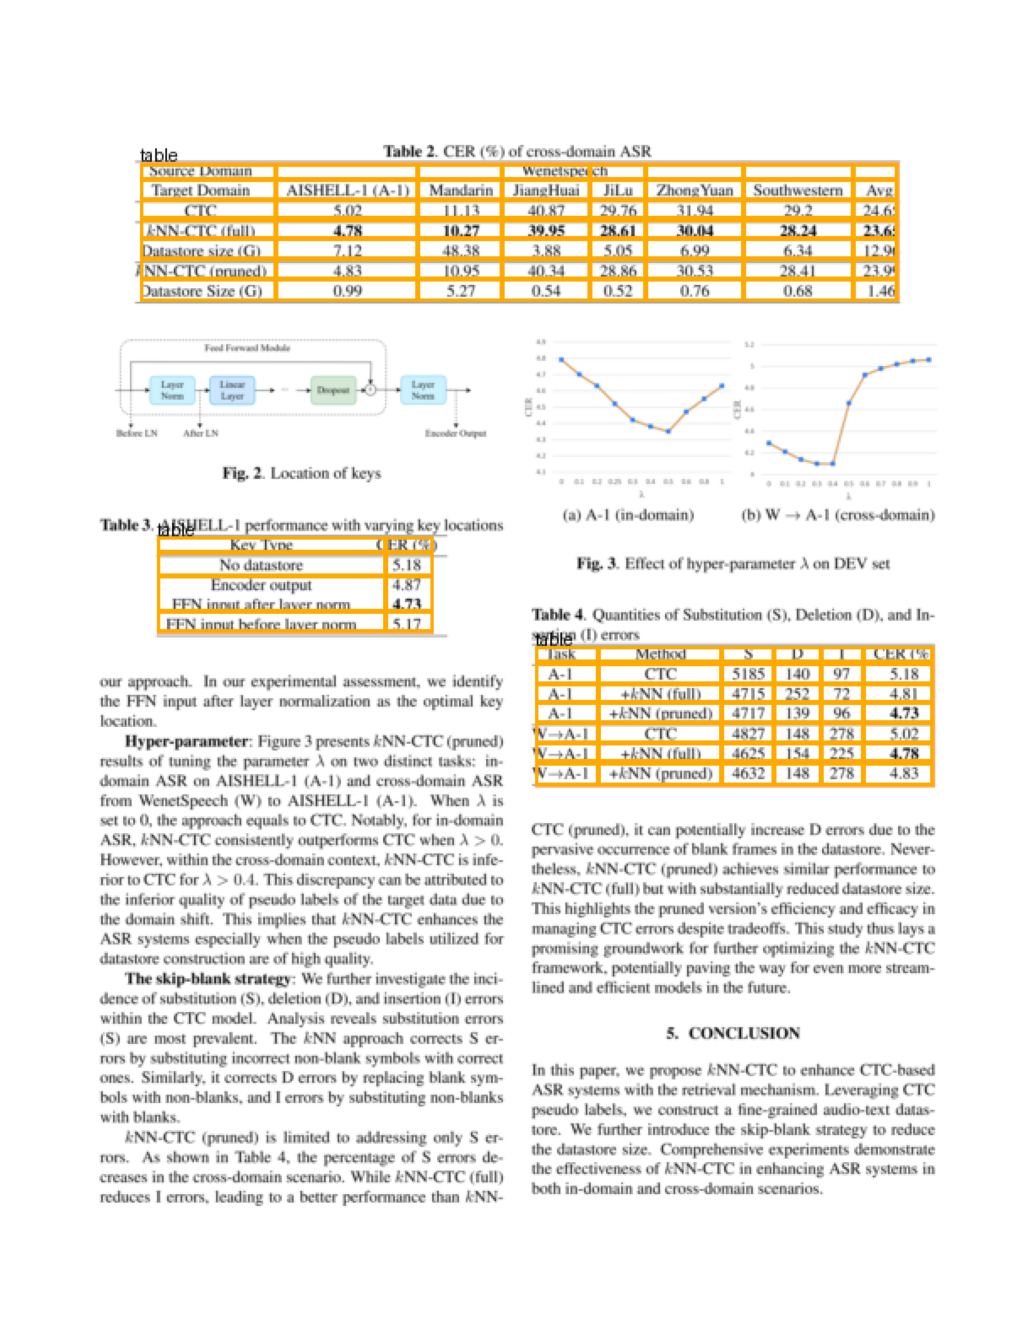

In [9]:
dp = next(df_iter)
np_image = dp.viz()

plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(np_image)

In [10]:
from IPython.core.display import HTML

HTML(dp.tables[0].html)

Task,Method,S,D,I,CER (%)
A-1,CTC,5185,140,97,5.18
A-1,+KNN (full),4715,252,72,4.81
A-1,+KNN (pruned),4717,139,96,4.73
W-A-1,CTC,4827,148,278,5.02
W-A-1,+KNN (full),4625,154,225,4.78
W-A-1,+KNN (pruned),4632,148,278,4.83


In [11]:
HTML(dp.tables[1].html)

In [12]:
HTML(dp.tables[2].html)

Key Type,CER (%)
No datastore,5.18
Encoder output FFN input after layer norm,4.87 4.73
FFN input before layer norm,5.17


## Legacy Default Setting

Until release `v.0.42`, this configuration was the default setting. Please note the dependencies on Tesseract and Detectron2 (for PyTorch) and on Tensorpack (on Tensorflow).

It works well on scientific papers.

In [ ]:
analyzer = dd.get_dd_analyzer(config_overwrite=
        ["PT.LAYOUT.WEIGHTS=layout/d2_model_0829999_layout_inf_only.pt",
         "PT.ITEM.WEIGHTS=item/d2_model_1639999_item_inf_only.pt",
         "PT.ITEM.FILTER=None",
         "SEGMENTATION.REMOVE_IOU_THRESHOLD_ROWS=0.001",
         "SEGMENTATION.REMOVE_IOU_THRESHOLD_COLS=0.001",
         "WORD_MATCHING.THRESHOLD=0.6",
         "WORD_MATCHING.PARENTAL_CATEGORIES=['text','title','list','figure','cell','spanning']",
         "TEXT_ORDERING.TEXT_BLOCK_CATEGORIES=['text','title','list','figure','cell','spanning']",
         "TEXT_ORDERING.FLOATING_TEXT_BLOCK_CATEGORIES=['text','title','list','figure']",
         "TEXT_ORDERING.INCLUDE_RESIDUAL_TEXT_CONTAINER=False",
         "USE_LAYOUT_LINK=False",
         "LAYOUT_LINK.PARENTAL_CATEGORIES=[]",
         "LAYOUT_LINK.CHILD_CATEGORIES=[]",
         "OCR.USE_DOCTR=False",
         "OCR.USE_TESSERACT=True",
         "USE_LAYOUT_NMS=False",
         "USE_TABLE_REFINEMENT=True",
         "USE_LINE_MATCHER=False",
         "LAYOUT_NMS_PAIRS.COMBINATIONS=None",
         "LAYOUT_NMS_PAIRS.THRESHOLDS=None",
         "LAYOUT_NMS_PAIRS.PRIORITY=None"])

[0527 17:28.06 @doctectionpipe.py:103]  INF  Processing 2312.13560_0.pdf
/Users/janismeyer/Projekte/deepdoctection/.venv/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[W MPSFallback.mm:13] Warning: The operator 'torchvision::nms' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (function operator())
[0527 17:28.10 @context.py:133]  INF  ImageLayoutService total: 3.6712 sec.
[0527 17:28.10 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0527 17:28.10 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0527 17:28.10 @context.py:133]  INF  TableSegmentationService total: 0.0 sec.
[0527 17:28.10 @context

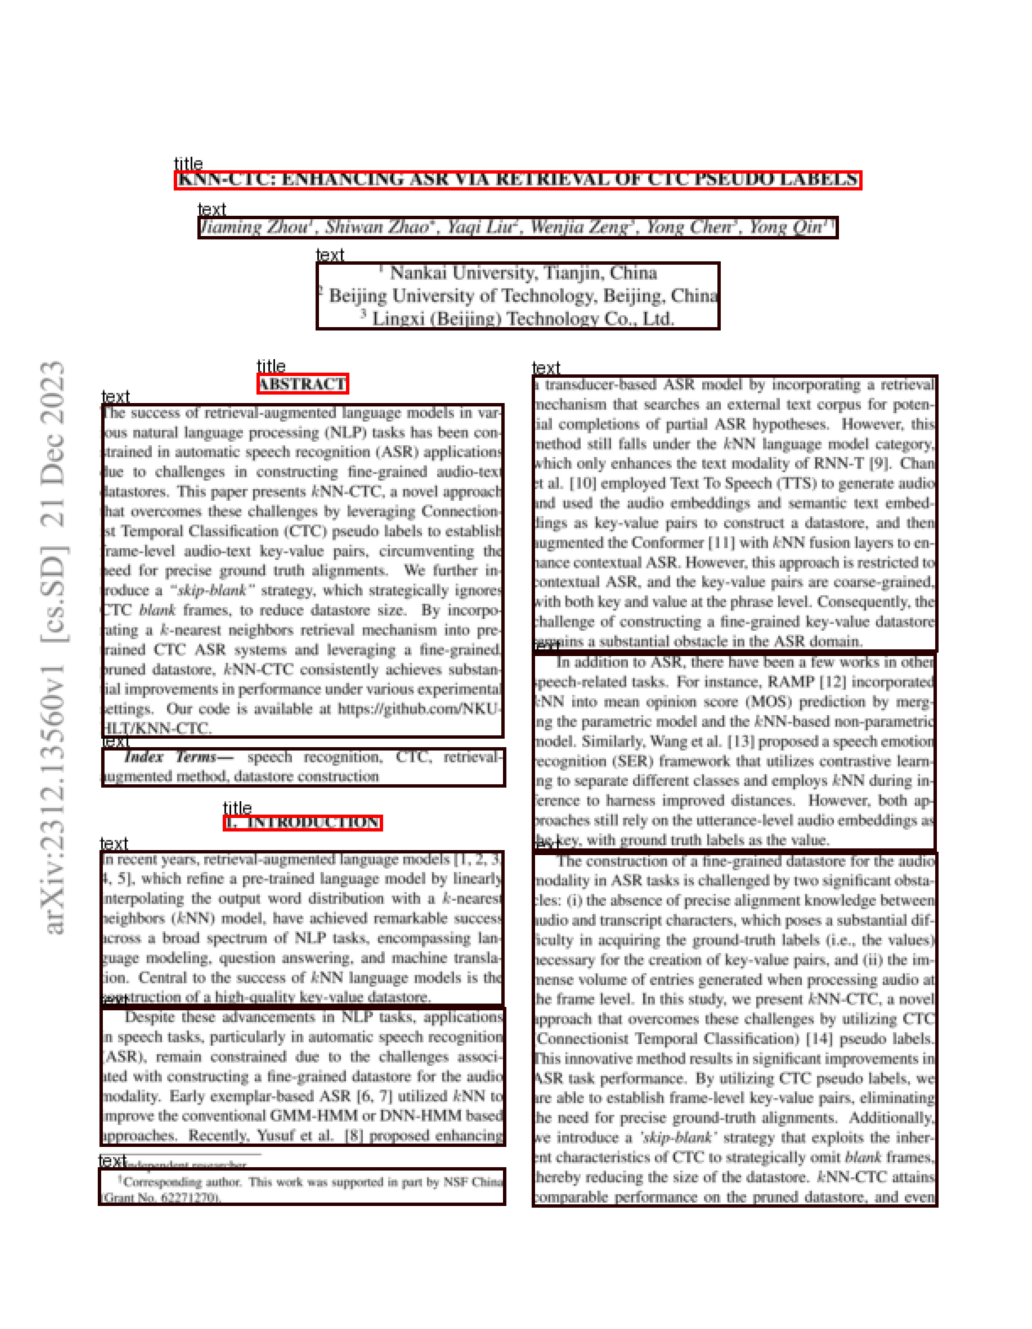

In [14]:
df = analyzer.analyze(path=path)
df.reset_state()
df_iter = iter(df)

dp = next(df_iter)
np_image = dp.viz()

plt.figure(figsize=(25, 17))
plt.axis('off')
plt.imshow(np_image)

In [16]:
print(dp.text)

KNN-CTC: ENHANCING ASR VIA RETRIEVAL OF CTC PSEUDO LABELS
Jiaming Zhou', Shiwan Zhao*, Yagi Liu?, Wenjia Zeng’, Yong Chen’, Yong Qin'*
' Nankai University, Tianjin, China ? Beijing University of Technology, Beijing, China 3 Lingxi (Beijing) Technology Co., Ltd.
ABSTRACT
The success of retrieval-augmented language models in var- ious natural language processing (NLP) tasks has been con- strained in automatic speech recognition (ASR) applications due to challenges in constructing fine-grained audio-text datastores. This paper presents KNN-CTC, a novel approach that overcomes these challenges by leveraging Connection- ist Temporal Classification (CTC) pseudo labels to establish frame-level audio-text key-value pairs, circumventing the need for precise ground truth alignments. We further in- troduce a “skip-blank” strategy, which strategically ignores CTC blank frames, to reduce datastore size. By incorpo- rating a k-nearest neighbors retrieval mechanism into pre- trained CTC ASR systems a